In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
data1=pd.read_csv("/content/drive/My Drive/amigos_egg_final/data/data.csv")


In [ ]:
data1=data1[0:50000]

In [ ]:
data1.shape

(50000, 70)

In [ ]:
label1=pd.read_csv("/content/drive/My Drive/amigos_egg_final/data/label.csv")
label1.shape

(249740, 12)

In [ ]:
label1=label1[0:50000]

In [ ]:
x=data1.values

In [ ]:
label1.shape

(50000, 12)

In [ ]:
label1.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [ ]:
y_val=label1.loc[:,'1']#valance

In [ ]:
y_val.shape

(50000,)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
from keras.utils import to_categorical
y = to_categorical(y_val)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
import numpy as np
x = np.reshape(x, (x.shape[0],1,x.shape[1]))

In [ ]:
x.shape

(50000, 1, 70)

In [ ]:
y.shape

(50000, 10)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(40000, 1, 70)
(40000, 10)
(10000, 1, 70)
(10000, 10)


In [ ]:
import tensorflow
# from tensorflow.keras import models
# from tensorflow.keras import layers
# from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM,BatchNormalization,Activation
model = Sequential()
model.add(LSTM(512, batch_input_shape = (None, None, x.shape[2]),return_sequences=True))
#model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(512,activation="relu",return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(LSTM(256,activation="relu",return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(LSTM(128,activation="relu",return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(64,activation="relu",return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(LSTM(32,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Dense(10))

rmsprop =tensorflow.keras.optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08)
model.compile(loss='mean_squared_error',
                  optimizer=rmsprop,
                  metrics=['accuracy'])
#adam = keras.optimizers.Adam(lr=0.5, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 512)         1193984   
_________________________________________________________________
batch_normalization (BatchNo (None, None, 512)         2048      
_________________________________________________________________
dropout (Dropout)            (None, None, 512)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 512)         2099200   
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 512)         2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 512)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 256)         7

In [ ]:
history = model.fit(x_train, y_train, epochs = 200, batch_size=300,validation_data= (x_test, y_test))

Epoch 1/200
134/134 [==============================] - 8s 57ms/step - loss: 1.5894 - accuracy: 0.1240 - val_loss: 0.1069 - val_accuracy: 0.0914
Epoch 2/200
134/134 [==============================] - 6s 48ms/step - loss: 1.3454 - accuracy: 0.1480 - val_loss: 0.1066 - val_accuracy: 0.0914
Epoch 3/200
134/134 [==============================] - 6s 47ms/step - loss: 1.1267 - accuracy: 0.1811 - val_loss: 0.0994 - val_accuracy: 0.0841
Epoch 4/200
134/134 [==============================] - 6s 47ms/step - loss: 0.9507 - accuracy: 0.2117 - val_loss: 0.0900 - val_accuracy: 0.4317
Epoch 5/200
134/134 [==============================] - 6s 48ms/step - loss: 0.7903 - accuracy: 0.2466 - val_loss: 0.1409 - val_accuracy: 0.5551
Epoch 6/200
134/134 [==============================] - 6s 47ms/step - loss: 0.6686 - accuracy: 0.2788 - val_loss: 0.1154 - val_accuracy: 0.5641
Epoch 7/200
134/134 [==============================] - 6s 46ms/step - loss: 0.5508 - accuracy: 0.3099 - val_loss: 0.2352 - val_accuracy:

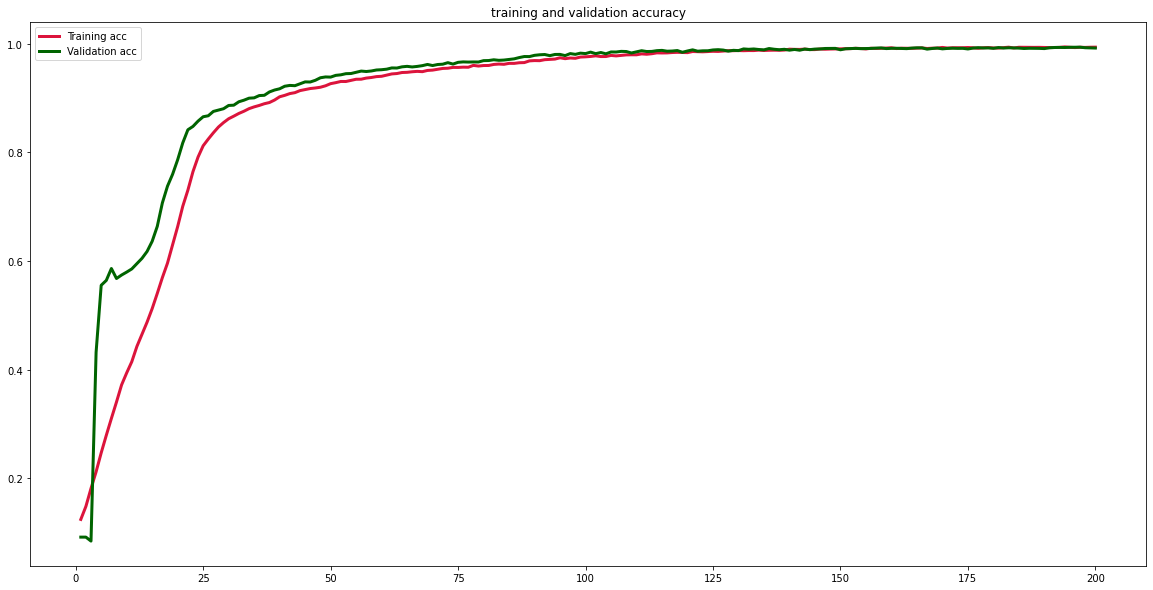

In [ ]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.figure(figsize=(20,10))
plt.plot(epochs,acc,'crimson',label='Training acc',linewidth=3)
plt.plot(epochs,val_acc,'darkgreen',label='Validation acc',linewidth=3)
plt.title("training and validation accuracy")
plt.legend()
plt.savefig("/content/drive/My Drive/amigos_egg_final/data/accuracy_resilt_2.png")

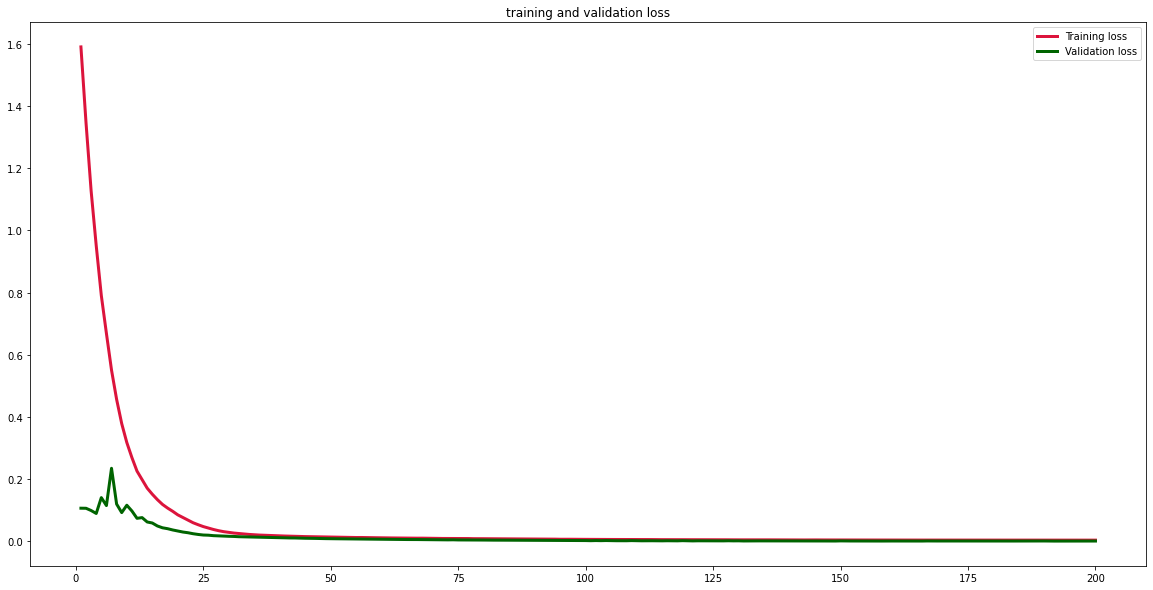

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(epochs,loss,'crimson',label='Training loss',linewidth=3)
plt.plot(epochs,val_loss,'darkgreen',label='Validation loss',linewidth=3)
plt.title("training and validation loss")
plt.legend()
plt.savefig("/content/drive/My Drive/amigos_egg_final/data/loss_2.jpg")
plt.show()

In [ ]:
model.save("/content/drive/My Drive/amigos_egg_final/egg_0_valance.h5")

In [ ]:
model.save("/content/drive/My Drive/amigos_egg_final/egg_0_valance")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/amigos_egg_final/egg_0_valance/assets


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 512)         1193984   
_________________________________________________________________
batch_normalization (BatchNo (None, None, 512)         2048      
_________________________________________________________________
dropout (Dropout)            (None, None, 512)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 512)         2099200   
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 512)         2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 512)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 256)         7

In [ ]:
from contextlib import redirect_stdout

with open('/content/drive/My Drive/amigos_egg_final/modelsummary.txt', 'w') as f:
    with redirect_stdout(f):
        model.summary()